# Análise Musical de 4 Playlist de Genêros Distintos #
## Uso do Método K-Means Para Agrupamento De Musicas Por Gênero ###

#### Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). ####

#### Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy ####

In [95]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import plotly.express as px
import plotly.offline as py
import pandas as pd

%matplotlib inline

pd.set_option('display.max_rows', None)

# Autenticação de usuário Spotify #

In [96]:
cid = '42721645be04461cbc0acbe37a294266'
secret = '143c7417f9654e0990faf7fd98ee5242'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# Função para buscar uma playlist pela API do Spotify #

In [97]:
def call_playlist(creator, playlist_id):
    playlist_features_list = ["artist","album","artist_id","track_name", "track_id", "danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        playlist_features = {}
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["artist_id"] = track["track"]["artists"][0]["id"]

        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:]:
            playlist_features[feature] = audio_features[feature]
        
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

## Criação do dataframe da playlist de opera ##

In [98]:
opera = call_playlist("spotify", "2PjVPkj4a9kBvQIXaZ6UUt")

# Extração de dados e análise playlist de opera #

In [99]:
dopera = opera[['danceability', 'key', 'loudness', 'energy', 'valence', 'tempo']]
dopera = dopera.apply(pd.to_numeric)

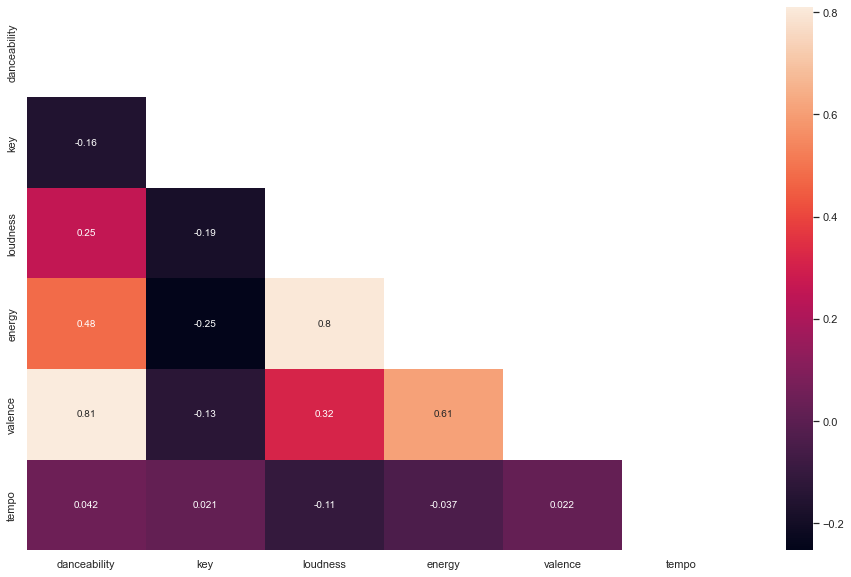

In [100]:
mask = np.zeros_like(dopera.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(16, 10))
corrMatrix = dopera.corr()
sn.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()

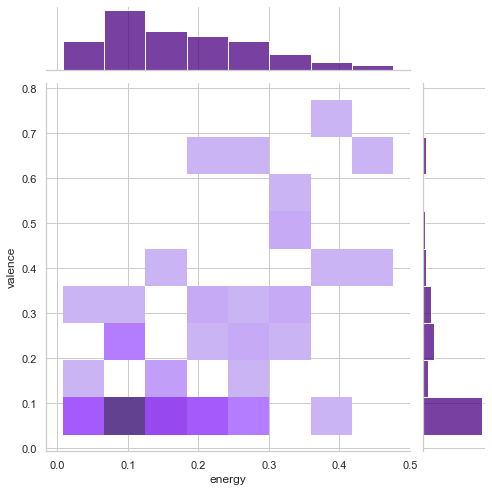

In [101]:
sn.set_context('notebook')
sn.set_style('whitegrid')
sn.jointplot(x=opera['energy'], y=opera['valence'], height=7, color='indigo', kind='hist' , joint_kws={'alpha':1})
plt.show()

In [102]:
x_1 = opera[['energy']]
y_1 = opera[['valence']]

In [103]:
reg = LinearRegression()
reg.fit(x_1, y_1)
reg.predict(x_1)
print('Theta 0:', reg.intercept_[0])
print('Theta 1:', reg.coef_[0][0])
mse = mean_squared_error(y_1, reg.predict(x_1))
print('Mean squared error:', mse)

Theta 0: -0.014327713168440531
Theta 1: 1.0157173721403037
Mean squared error: 0.018713670762203913


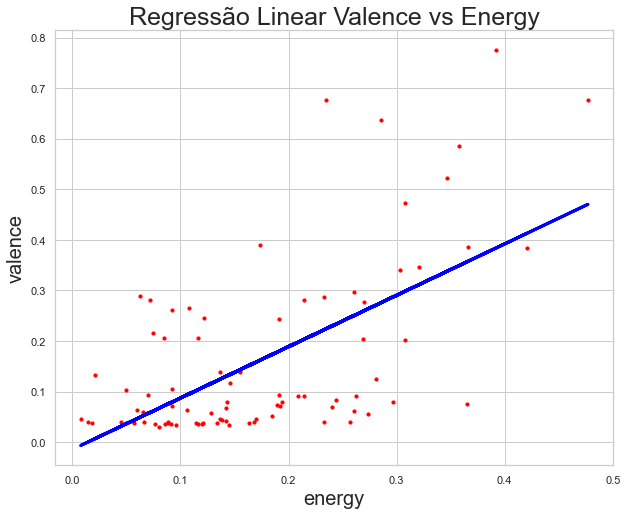

In [104]:
fig = plt.figure(figsize=[10, 8])
plt.scatter(x_1, y_1, s=10, c='red')

plt.title('Regressão Linear Valence vs Energy', fontsize=25)
plt.xlabel('energy', fontsize=20)
plt.ylabel('valence', fontsize=20)

plt.plot(x_1, reg.predict(x_1), c='blue', linewidth=3)
plt.show()

## Criação do dataframe da playlist de lofi ##

In [105]:
lofi = call_playlist("spotify", "5YKm5Zt0AUdKrlrvWzUV6l")

# Extração de dados e análise playlist de lofi #

In [106]:
dlofi = lofi[['danceability', 'key', 'loudness', 'energy', 'valence', 'tempo']]
dlofi = dlofi.apply(pd.to_numeric)

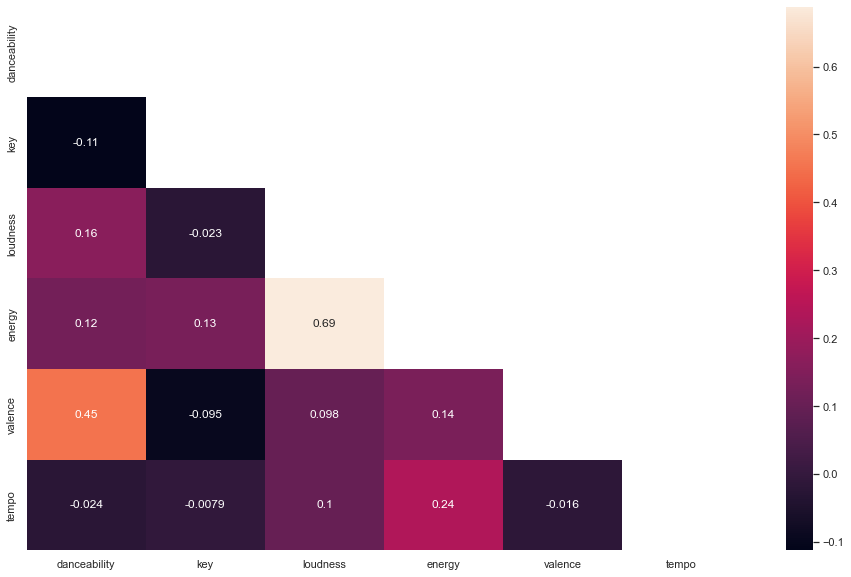

In [107]:
mask = np.zeros_like(dlofi.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(16, 10))
corrMatrix = dlofi.corr()
sn.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()

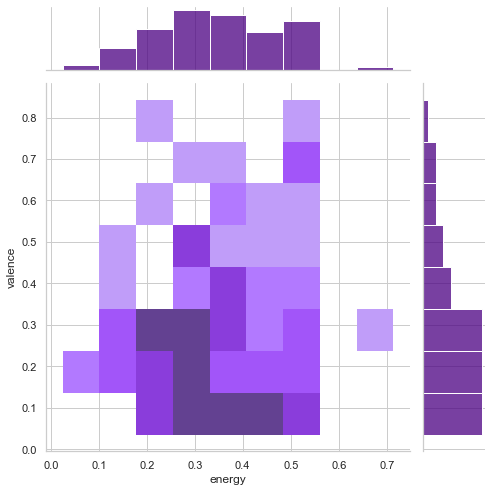

In [108]:
sn.set_context('notebook')
sn.set_style('whitegrid')
sn.jointplot(x=lofi['energy'], y=lofi['valence'], height=7, color='indigo', kind='hist' , joint_kws={'alpha':1})
plt.show()

In [109]:
x_2 = lofi[['energy']]
y_2 = lofi[['valence']]

In [110]:
reg = LinearRegression()
reg.fit(x_2, y_2)
reg.predict(x_2)
print('Theta 0:', reg.intercept_[0])
print('Theta 1:', reg.coef_[0][0])
mse = mean_squared_error(y_2, reg.predict(x_2))
print('Mean squared error:', mse)

Theta 0: 0.2180590651634248
Theta 1: 0.1941722435404532
Mean squared error: 0.03316689255751357


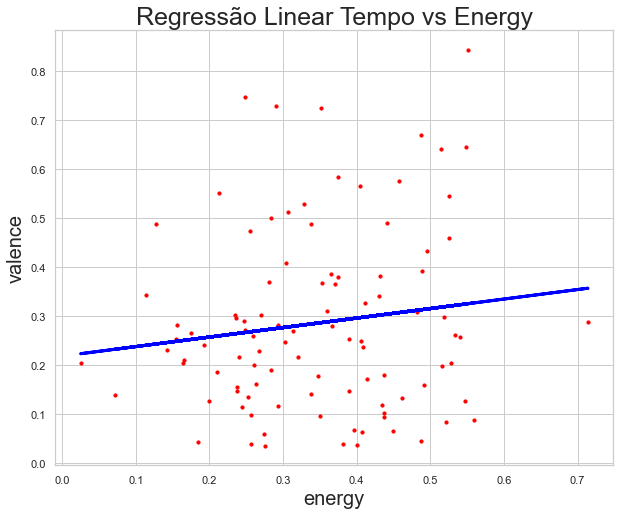

In [111]:
fig = plt.figure(figsize=[10, 8])
plt.scatter(x_2, y_2, s=10, c='red')

plt.title('Regressão Linear Tempo vs Energy', fontsize=25)
plt.xlabel('energy', fontsize=20)
plt.ylabel('valence', fontsize=20)

plt.plot(x_2, reg.predict(x_2), c='blue', linewidth=3)
plt.show()

## Criação do dataframe da playlist de rock ##

In [112]:
rock = call_playlist("spotify","37i9dQZF1DXd6tJtr4qeot")

# Extração de dados e análise playlist de rock #

In [113]:
drock = rock[['danceability', 'key', 'loudness', 'energy', 'valence', 'tempo']]
drock = drock.apply(pd.to_numeric)

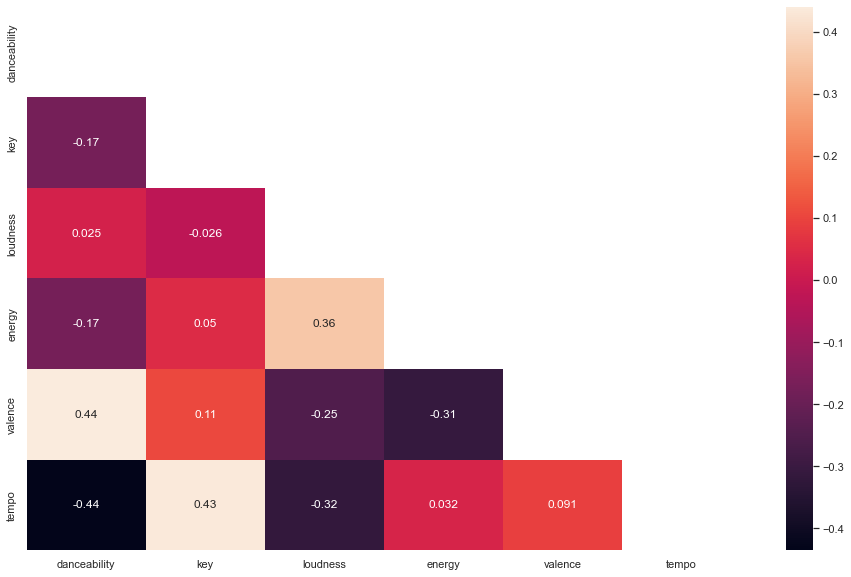

In [114]:
mask = np.zeros_like(drock.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(16, 10))
corrMatrix = drock.corr()
sn.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()

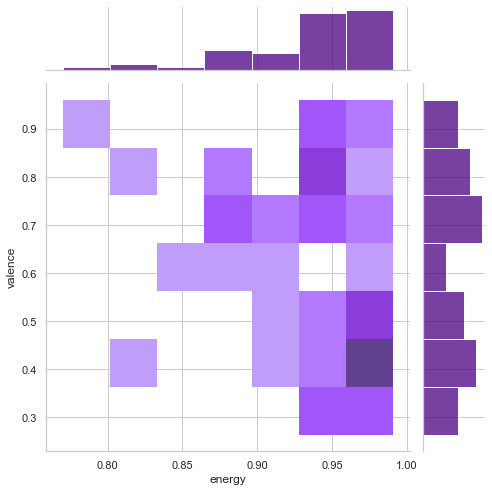

In [115]:
sn.set_context('notebook')
sn.set_style('whitegrid')
sn.jointplot(x=rock['energy'], y=rock['valence'], height=7, color='indigo', kind='hist' , joint_kws={'alpha':1})
plt.show()

In [116]:
x_3 = rock[['energy']]
y_3 = rock[['valence']]

In [117]:
reg = LinearRegression()
reg.fit(x_3, y_3)
reg.predict(x_3)
print('Theta 0:', reg.intercept_[0])
print('Theta 1:', reg.coef_[0][0])
mse = mean_squared_error(y_3, reg.predict(x_3))
print('Mean squared error:', mse)

Theta 0: 1.7528276176681787
Theta 1: -1.2170028242372943
Mean squared error: 0.035051425246559596


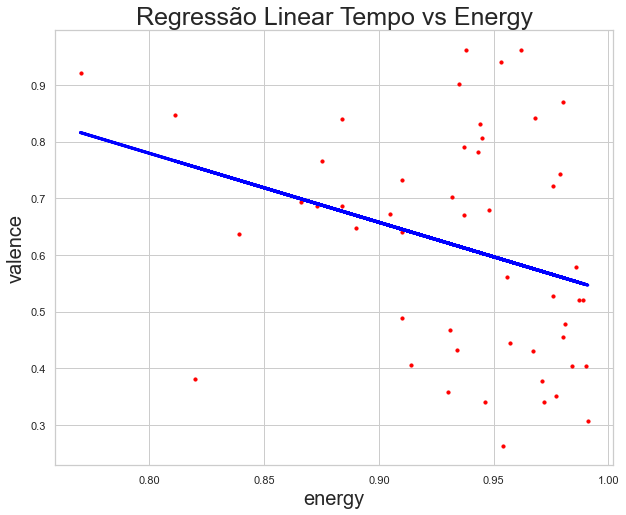

In [118]:
fig = plt.figure(figsize=[10, 8])
plt.scatter(x_3, y_3, s=10, c='red')

plt.title('Regressão Linear Tempo vs Energy', fontsize=25)
plt.xlabel('energy', fontsize=20)
plt.ylabel('valence', fontsize=20)

plt.plot(x_3, reg.predict(x_3), c='blue', linewidth=3)
plt.show()

# Extração de dados e análise playlist de pagode #

In [119]:
pagode = call_playlist("spotify","37i9dQZF1DXc4dYxgBQ1lf")

In [120]:
dpagode = pagode[['danceability', 'key', 'loudness', 'energy', 'valence', 'tempo']]
dpagode = dpagode.apply(pd.to_numeric)

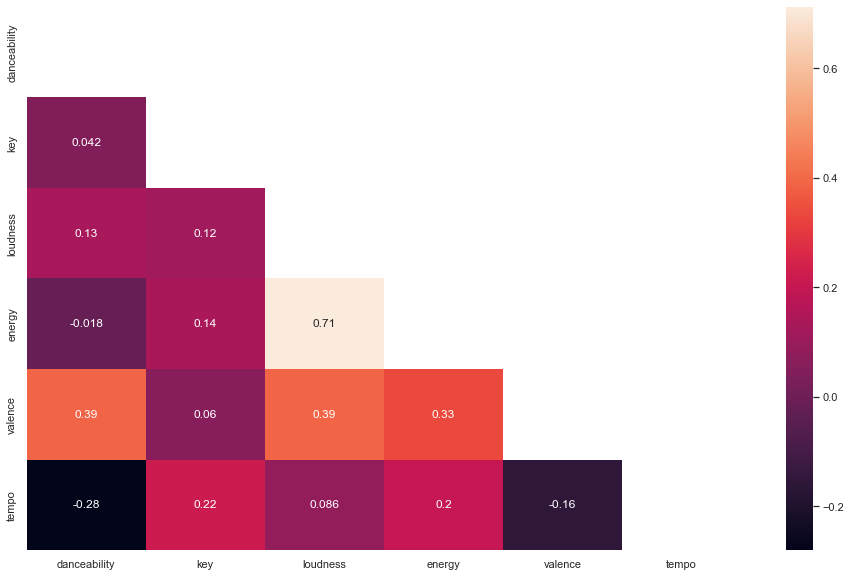

In [121]:
mask = np.zeros_like(dpagode.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(16, 10))
corrMatrix = dpagode.corr()
sn.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()

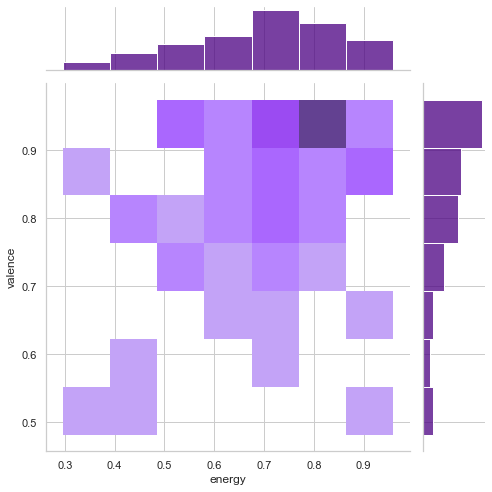

In [122]:
sn.set_context('notebook')
sn.set_style('whitegrid')
sn.jointplot(x=pagode['energy'], y=pagode['valence'], height=7, color='indigo', kind='hist' , joint_kws={'alpha':1})
plt.show()

In [123]:
x_4 = pagode[['energy']]
y_4 = pagode[['valence']]

In [124]:
reg = LinearRegression()
reg.fit(x_4, y_4)
reg.predict(x_4)
print('Theta 0:', reg.intercept_[0])
print('Theta 1:', reg.coef_[0][0])
mse = mean_squared_error(y_4, reg.predict(x_4))
print('Mean squared error:', mse)

Theta 0: 0.6211530395486541
Theta 1: 0.2791564591148933
Mean squared error: 0.014300907000129509


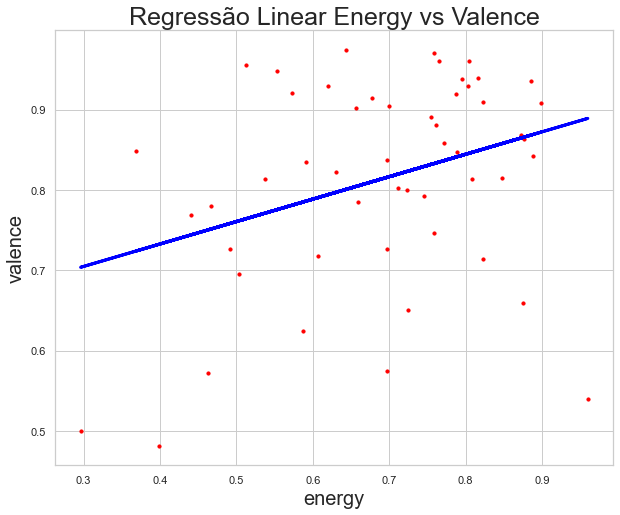

In [125]:
fig = plt.figure(figsize=[10, 8])
plt.scatter(x_4, y_4, s=10, c='red')

plt.title('Regressão Linear Energy vs Valence', fontsize=25)
plt.ylabel('valence', fontsize=20)
plt.xlabel('energy', fontsize=20)

plt.plot(x_4, reg.predict(x_4), c='blue', linewidth=3)
plt.show()

# Junção dos dados #

In [126]:
frames = [rock, pagode, lofi, opera]
results = pd.concat(frames)
results = results.reset_index(drop=True)
results

,artist,album,artist_id,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Offspring,Americana,5LfGQac0EIXyAN8aUwmNAQ,The Kids Aren't Alright,4sQJXbtxwoKHG7PwMRJ0Ig,0.52,0.945,1,-4.197,1,0.0335,0.00005,0.0495,0.807,99.603,179600,4
1,Rancid,Indestructible,6xTk3EK5T9UzudENVvu9YB,Fall Back Down,3B8sLBRLKcv0f5j3yUMXoU,0.539,0.989,4,-1.865,1,0.0517,0,0.131,0.52,104.076,223240,4
2,Pennywise,Pennywise,6i0KVTOvm96T55mbp742ks,Bro Hymn,4ksd5zvWtM0CHCyK1brHWL,0.408,0.82,0,-5.116,1,0.0423,0.000007,0.689,0.382,98.288,180893,4
3,Bad Religion,Stranger Than Fiction,2yJwXpWAQOOl5XFzbCxLs9,21st Century [Digital Boy],4vq6RWl0rFBoeSxDkdkUNh,0.513,0.944,1,-6.093,0,0.0378,0.000001,0.0574,0.831,131.866,168040,4
4,Social Distortion,Social Distortion,16nn7kCHPWIB6uK09GQCNI,Story of My Life,4Q4w8aRdfhIIEhBututktL,0.328,0.884,6,-7.982,1,0.0338,0.0166,0.327,0.686,201.868,346333,4
5,blink-182,Dude Ranch,6FBDaR13swtiWwGhX1WQsP,Dammit,6WkSUgo1VdpzgtiXKlFPcY,0.426,0.972,0,-5.122,1,0.0954,0,0.171,0.341,111.221,165373,4
6,Sum 41,"All Killer, No Filler",0qT79UgT5tY4yudH9VfsdT,Fat Lip,4dzOxPZFYX77xpMwv4EhnO,0.405,0.91,9,-5.234,1,0.128,0,0.0739,0.641,196.444,178267,4
7,Against Me!,New Wave (U.S. Version),29lz7gs8edwnnfuXW4FhMl,Thrash Unreal,3c3XnCPwxGhQEHFxxjQcWe,0.555,0.839,5,-3.583,1,0.0483,0.0574,0.102,0.637,124.877,254200,4
8,The Offspring,Smash [Remastered],5LfGQac0EIXyAN8aUwmNAQ,Self-Esteem,4u4KpbgVzzF62uoOItsEiG,0.482,0.932,0,-3.463,1,0.0594,0,0.358,0.702,104.532,257827,4
9,Descendents,Cool To Be You,1FGH4Bh7g9W6V4fUcKZWp5,'Merican,0IuIa71dOb2C3uDoQEKuyB,0.527,0.99,9,-4.084,0,0.103,0,0.315,0.405,100.669,111200,4


### Busca dos genêros através do id do artista com a API do spotify ###

In [127]:
artist_genres = []
for a_id in results.artist_id:
    artist = sp.artist(a_id)
    artist_genres.append(artist['genres'])
    
    

In [128]:

results = results.assign(artist_genres=artist_genres)
results['artist_genres_str'] = results['artist_genres'].astype('str')
idxName = results[results['artist_genres_str']=='[]'].index
results.drop(idxName, inplace=True)
results = results.reset_index(drop=True)

In [129]:
results

,artist,album,artist_id,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,artist_genres_str
0,The Offspring,Americana,5LfGQac0EIXyAN8aUwmNAQ,The Kids Aren't Alright,4sQJXbtxwoKHG7PwMRJ0Ig,0.52,0.945,1,-4.197,1,0.0335,0.00005,0.0495,0.807,99.603,179600,4,"[alternative metal, permanent wave, punk, rock...","['alternative metal', 'permanent wave', 'punk'..."
1,Rancid,Indestructible,6xTk3EK5T9UzudENVvu9YB,Fall Back Down,3B8sLBRLKcv0f5j3yUMXoU,0.539,0.989,4,-1.865,1,0.0517,0,0.131,0.52,104.076,223240,4,"[punk, rap rock, ska punk, skate punk]","['punk', 'rap rock', 'ska punk', 'skate punk']"
2,Pennywise,Pennywise,6i0KVTOvm96T55mbp742ks,Bro Hymn,4ksd5zvWtM0CHCyK1brHWL,0.408,0.82,0,-5.116,1,0.0423,0.000007,0.689,0.382,98.288,180893,4,"[melodic hardcore, punk, skate punk, socal pop...","['melodic hardcore', 'punk', 'skate punk', 'so..."
3,Bad Religion,Stranger Than Fiction,2yJwXpWAQOOl5XFzbCxLs9,21st Century [Digital Boy],4vq6RWl0rFBoeSxDkdkUNh,0.513,0.944,1,-6.093,0,0.0378,0.000001,0.0574,0.831,131.866,168040,4,"[punk, skate punk, socal pop punk]","['punk', 'skate punk', 'socal pop punk']"
4,Social Distortion,Social Distortion,16nn7kCHPWIB6uK09GQCNI,Story of My Life,4Q4w8aRdfhIIEhBututktL,0.328,0.884,6,-7.982,1,0.0338,0.0166,0.327,0.686,201.868,346333,4,"[punk, punk 'n' roll, skate punk, socal pop punk]","['punk', ""punk 'n' roll"", 'skate punk', 'socal..."
5,blink-182,Dude Ranch,6FBDaR13swtiWwGhX1WQsP,Dammit,6WkSUgo1VdpzgtiXKlFPcY,0.426,0.972,0,-5.122,1,0.0954,0,0.171,0.341,111.221,165373,4,"[pop punk, punk, rock, socal pop punk]","['pop punk', 'punk', 'rock', 'socal pop punk']"
6,Sum 41,"All Killer, No Filler",0qT79UgT5tY4yudH9VfsdT,Fat Lip,4dzOxPZFYX77xpMwv4EhnO,0.405,0.91,9,-5.234,1,0.128,0,0.0739,0.641,196.444,178267,4,"[canadian pop punk, canadian punk, punk, rock]","['canadian pop punk', 'canadian punk', 'punk',..."
7,Against Me!,New Wave (U.S. Version),29lz7gs8edwnnfuXW4FhMl,Thrash Unreal,3c3XnCPwxGhQEHFxxjQcWe,0.555,0.839,5,-3.583,1,0.0483,0.0574,0.102,0.637,124.877,254200,4,"[gainesville indie, orgcore, punk, skate punk]","['gainesville indie', 'orgcore', 'punk', 'skat..."
8,The Offspring,Smash [Remastered],5LfGQac0EIXyAN8aUwmNAQ,Self-Esteem,4u4KpbgVzzF62uoOItsEiG,0.482,0.932,0,-3.463,1,0.0594,0,0.358,0.702,104.532,257827,4,"[alternative metal, permanent wave, punk, rock...","['alternative metal', 'permanent wave', 'punk'..."
9,Descendents,Cool To Be You,1FGH4Bh7g9W6V4fUcKZWp5,'Merican,0IuIa71dOb2C3uDoQEKuyB,0.527,0.99,9,-4.084,0,0.103,0,0.315,0.405,100.669,111200,4,"[punk, ska punk, skate punk]","['punk', 'ska punk', 'skate punk']"


In [130]:
dx = results[['energy', 'valence']]

## Calculando a quantidade de clusters ##

In [131]:
def calcular_wcss(dp):
  wcss = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dp)
    wcss.append(kmeans.inertia_)
  return wcss

In [132]:
wcss = calcular_wcss(dx)

In [133]:
for i in range(len(wcss)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss[i]}')

O cluster 0 possui valor de WCSS de: 44.85895579350813
O cluster 1 possui valor de WCSS de: 10.293486960698342
O cluster 2 possui valor de WCSS de: 7.221316046792596
O cluster 3 possui valor de WCSS de: 4.783986925127982
O cluster 4 possui valor de WCSS de: 3.521266629573123
O cluster 5 possui valor de WCSS de: 2.7695015788489856
O cluster 6 possui valor de WCSS de: 2.287787360676795
O cluster 7 possui valor de WCSS de: 1.8571083966409734
O cluster 8 possui valor de WCSS de: 1.5707945662540317
O cluster 9 possui valor de WCSS de: 1.342488431440544


In [134]:
grafico_wcss = px.line(x = range(1,11), y=wcss)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando o WCSS', xaxis_title='Numero de Clusters', 
                  yaxis_title='Valor do WCSS', template = 'plotly_white')

## Treinamento ##

In [135]:
kmeans_musicas = KMeans(n_clusters=4, random_state=0)
results['cluster'] = kmeans_musicas.fit_predict(dx)

In [136]:
final_results = results[['valence', 'energy', 'artist_genres', 'cluster']]

## Calculando os centroides ##

In [137]:
centroides_clusters = kmeans_musicas.cluster_centers_
centroides_clusters

array([[0.15851974, 0.08781688],
       [0.79474627, 0.81673134],
       [0.95679167, 0.43254167],
       [0.36019512, 0.31237805]])

## Grafico ##

In [138]:
grafico = px.scatter(x = results['energy'], y = results['valence'],
                     color= results['cluster'], )

grafico_centroide = px.scatter(x = centroides_clusters[:,0], 
                               y = centroides_clusters[:,1], size=[10, 10, 10, 10])

grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [139]:
final_results.sort_values(by=['cluster'])

,valence,energy,artist_genres,cluster
208,0.0629,0.106,"[classical, classical era, early music, galant...",0
139,0.289,0.0622,"[classical, classical era]",0
142,0.0713,0.192,[canzone napoletana],0
144,0.0707,0.0922,"[early romantic era, italian opera, italian ro...",0
145,0.0335,0.145,"[classical, italian opera, italian romanticism...",0
146,0.0359,0.12,"[italian opera, italian romanticism, post-roma...",0
147,0.282,0.0719,"[early romantic era, italian opera, italian ro...",0
149,0.0343,0.096,"[baroque, classical, early music, english baro...",0
138,0.0383,0.163,"[american modern classical, classical, orchest...",0
150,0.206,0.116,"[classical, french opera, french romanticism, ...",0
